In [1]:
import numpy as np
import pandas as pd
import sklearn.metrics as metrics
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# Taken from sklearn docs 
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [3]:
def prune(decisiontree, min_samples_leaf = 1):
    if decisiontree.min_samples_leaf >= min_samples_leaf:
        raise Exception('Tree already more pruned')
    else:
        decisiontree.min_samples_leaf = min_samples_leaf
        tree = decisiontree.tree_
        for i in range(tree.node_count):
            n_samples = tree.n_node_samples[i]
            if n_samples <= min_samples_leaf:
                tree.children_left[i]=-1
                tree.children_right[i]=-1

In [4]:
#Importing the training dataset
trainSet  = pd.read_csv('train.csv')
#Encoding the dataset 
trainingEncoded = pd.get_dummies(trainSet)
x = trainingEncoded.drop(['hand'], axis=1)
y = trainingEncoded['hand']
#Splitting the datasets to independent training and test splits for later use (randomly)
xTrain, xVal, yTrain, yVal = train_test_split(x, 
                                              y,
                                              test_size=.1)

In [63]:
# Decision Tree Zone
dt = DecisionTreeClassifier(splitter='best', min_samples_split = 120, min_samples_leaf = 1)
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
# parameters = {'splitter':('best', 'random')}
# parameters = {'presort':(True, False)}
# parameters = {'min_impurity_decrease': (np.arange(0.0, 1.01, 0.1))}
# parameters = {'min_samples_split': (np.arange(10, 210, 10))}
# parameters = {'min_samples_leaf': (np.arange(1, 11))}
dtGS = GridSearchCV(dt, parameters, cv = cv, scoring='accuracy', verbose=10, n_jobs=-1)
dtGS.fit(xTrain, yTrain)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] min_samples_leaf=1 ..............................................
[CV] min_samples_leaf=1 ..............................................
[CV] ......... min_samples_leaf=1, score=0.531319413594, total=   0.1s
[CV] min_samples_leaf=1 ..............................................
[CV] ......... min_samples_leaf=1, score=0.542869835629, total=   0.1s
[CV] min_samples_leaf=1 ..............................................
[CV] min_samples_leaf=1 ..............................................
[CV] ......... min_samples_leaf=1, score=0.548200799645, total=   0.1s
[CV] min_samples_leaf=1 ..............................................
[CV] ......... min_samples_leaf=1, score=0.554864504665, total=   0.1s


[Parallel(n_jobs=-1)]: Batch computation too fast (0.1707s.) Setting batch_size=2.


[CV] ......... min_samples_leaf=1, score=0.545535317637, total=   0.1s
[CV] min_samples_leaf=1 ..............................................
[CV] ......... min_samples_leaf=1, score=0.536206130609, total=   0.1s
[CV] min_samples_leaf=1 ..............................................
[CV] min_samples_leaf=1 ..............................................
[CV] ......... min_samples_leaf=1, score=0.511550422035, total=   0.1s


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.4s


[CV] ......... min_samples_leaf=1, score=0.562194580187, total=   0.1s
[CV] min_samples_leaf=1 ..............................................
[CV] ......... min_samples_leaf=1, score=0.554420257663, total=   0.2s
[CV] min_samples_leaf=2 ..............................................
[CV] min_samples_leaf=2 ..............................................
[CV] ......... min_samples_leaf=2, score=0.531319413594, total=   0.1s
[CV] min_samples_leaf=2 ..............................................
[CV] min_samples_leaf=2 ..............................................
[CV] ......... min_samples_leaf=1, score=0.564637938694, total=   0.2s
[CV] ......... min_samples_leaf=2, score=0.548200799645, total=   0.1s
[CV] min_samples_leaf=2 ..............................................
[CV] min_samples_leaf=2 ..............................................
[CV] ......... min_samples_leaf=2, score=0.545535317637, total=   0.1s
[CV] min_samples_leaf=2 ..............................................
[CV] .

[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.9s


[CV] ......... min_samples_leaf=3, score=0.531319413594, total=   0.2s
[CV] min_samples_leaf=3 ..............................................
[CV] ......... min_samples_leaf=2, score=0.554420257663, total=   0.2s
[CV] ......... min_samples_leaf=2, score=0.563749444691, total=   0.1s
[CV] ......... min_samples_leaf=3, score=0.548422923145, total=   0.2s
[CV] min_samples_leaf=3 ..............................................
[CV] min_samples_leaf=3 ..............................................
[CV] min_samples_leaf=3 ..............................................
[CV] ......... min_samples_leaf=3, score=0.542869835629, total=   0.1s
[CV] ......... min_samples_leaf=3, score=0.545535317637, total=   0.1s
[CV] min_samples_leaf=3 ..............................................
[CV] min_samples_leaf=3 ..............................................
[CV] ......... min_samples_leaf=3, score=0.554864504665, total=   0.2s
[CV] ......... min_samples_leaf=3, score=0.511550422035, total=   0.2s
[CV] m

[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.6s


[CV] ......... min_samples_leaf=4, score=0.542869835629, total=   0.1s
[CV] min_samples_leaf=4 ..............................................
[CV] ......... min_samples_leaf=4, score=0.544868947135, total=   0.2s
[CV] min_samples_leaf=4 ..............................................
[CV] ......... min_samples_leaf=4, score=0.511550422035, total=   0.1s
[CV] min_samples_leaf=4 ..............................................
[CV] ......... min_samples_leaf=4, score=0.554864504665, total=   0.1s
[CV] min_samples_leaf=5 ..............................................
[CV] ......... min_samples_leaf=4, score=0.562194580187, total=   0.1s
[CV] ......... min_samples_leaf=4, score=0.536206130609, total=   0.1s
[CV] min_samples_leaf=4 ..............................................
[CV] min_samples_leaf=5 ..............................................
[CV] ......... min_samples_leaf=4, score=0.554420257663, total=   0.2s
[CV] min_samples_leaf=5 ..............................................
[CV] .

[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    2.2s


[CV] ......... min_samples_leaf=5, score=0.554864504665, total=   0.1s
[CV] min_samples_leaf=6 ..............................................
[CV] ......... min_samples_leaf=5, score=0.536206130609, total=   0.1s
[CV] ......... min_samples_leaf=5, score=0.562194580187, total=   0.1s
[CV] min_samples_leaf=5 ..............................................
[CV] min_samples_leaf=6 ..............................................
[CV] ......... min_samples_leaf=5, score=0.554420257663, total=   0.2s
[CV] ......... min_samples_leaf=6, score=0.531319413594, total=   0.1s
[CV] min_samples_leaf=6 ..............................................
[CV] ......... min_samples_leaf=5, score=0.564637938694, total=   0.1s
[CV] min_samples_leaf=6 ..............................................
[CV] min_samples_leaf=6 ..............................................
[CV] ......... min_samples_leaf=6, score=0.548422923145, total=   0.1s
[CV] min_samples_leaf=6 ..............................................
[CV] .

[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    3.0s


[CV] ......... min_samples_leaf=7, score=0.511550422035, total=   0.1s
[CV] min_samples_leaf=7 ..............................................
[CV] ......... min_samples_leaf=7, score=0.554864504665, total=   0.1s
[CV] min_samples_leaf=8 ..............................................
[CV] ......... min_samples_leaf=7, score=0.562194580187, total=   0.1s
[CV] min_samples_leaf=7 ..............................................
[CV] ......... min_samples_leaf=7, score=0.535984007108, total=   0.1s
[CV] min_samples_leaf=8 ..............................................
[CV] ......... min_samples_leaf=7, score=0.554420257663, total=   0.1s
[CV] min_samples_leaf=8 ..............................................
[CV] ......... min_samples_leaf=7, score=0.563083074189, total=   0.2s
[CV] ......... min_samples_leaf=8, score=0.531319413594, total=   0.2s
[CV] min_samples_leaf=8 ..............................................
[CV] min_samples_leaf=8 ..............................................
[CV] .

[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    3.7s


[CV] ......... min_samples_leaf=9, score=0.542869835629, total=   0.1s
[CV] min_samples_leaf=9 ..............................................
[CV] ......... min_samples_leaf=9, score=0.544424700133, total=   0.1s
[CV] min_samples_leaf=9 ..............................................
[CV] ......... min_samples_leaf=9, score=0.554864504665, total=   0.2s
[CV] ......... min_samples_leaf=9, score=0.511994669036, total=   0.1s
[CV] min_samples_leaf=9 ..............................................
[CV] min_samples_leaf=10 .............................................
[CV] ......... min_samples_leaf=9, score=0.562194580187, total=   0.2s
[CV] min_samples_leaf=9 ..............................................
[CV] ......... min_samples_leaf=9, score=0.535539760107, total=   0.2s
[CV] min_samples_leaf=10 .............................................
[CV] ........ min_samples_leaf=10, score=0.531319413594, total=   0.1s
[CV] min_samples_leaf=10 .............................................
[CV] .

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.6s finished


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.2, train_size=None),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=120,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=10)

In [64]:
print(dtGS.best_score_)
print(dtGS.best_estimator_.min_samples_leaf)
print dtGS.cv_results_['mean_test_score']
print dtGS.cv_results_['mean_train_score']

0.545179920036
1
[ 0.54517992  0.54509107  0.54511328  0.54504665  0.54511328  0.54511328
  0.54493558  0.54491337  0.54489116  0.54506886]
[ 0.60206031  0.60206031  0.60206031  0.60204365  0.60204365  0.6020381
  0.60198256  0.60192703  0.60185483  0.6018826 ]


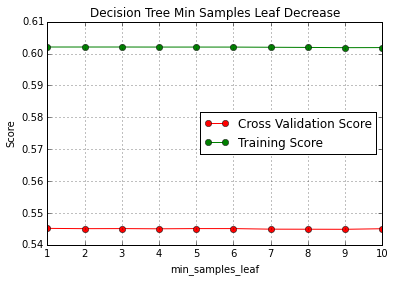

In [65]:
# Graph drawing section, code changed everytime when i need a new graph, will be commented
plt.figure()
plt.title("Decision Tree Min Samples Leaf Decrease")
plt.xlabel("min_samples_leaf")
plt.ylabel("Score")

plt.grid()

plt.plot(dtGS.param_grid['min_samples_leaf'], dtGS.cv_results_['mean_test_score'], 'o-', color="r",
         label="Cross Validation Score" )
plt.plot(dtGS.param_grid['min_samples_leaf'], dtGS.cv_results_['mean_train_score'], 'o-', color="g",
         label="Training Score")
plt.legend(loc="best")

In [68]:
# Pruning evaluator
testScoreArray = []
trainScoreArray = []
bestScore = 0.0
index = -1
for i in range(10, 2010, 10):
    dt = DecisionTreeClassifier(splitter='best', min_samples_split = 120, min_samples_leaf = 1)
    dt.fit(xTrain, yTrain)
    prune(dt, i)
    
    trainDtPred = dt.predict(xTrain)
    trainDtPred = pd.DataFrame(data=trainDtPred, columns=['hand'])
    trainAcc = accuracy_score(yTrain, trainDtPred)
    
    testDtPred = dt.predict(xVal)
    testDtPred = pd.DataFrame(data=testDtPred, columns=['hand'])
    testAcc = accuracy_score(yVal, testDtPred)
    
    if testAcc > bestScore:
        index = i
        bestScore = testAcc
    trainScoreArray.append(trainAcc)
    testScoreArray.append(testAcc)
print bestScore
print index

0.570571771291
380


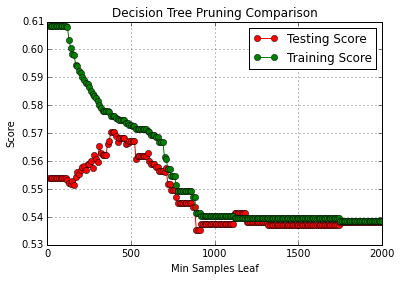

In [71]:
# Pruning Grapher
plt.figure()
plt.title("Decision Tree Pruning Comparison")
plt.xlabel("Min Samples Leaf")
plt.ylabel("Score")
# plt.ylim(*(0.55, 1.02))

plt.grid()

plt.plot(np.arange(10, 2010, 10), testScoreArray, 'o-', color="r", label = "Testing Score")
plt.plot(np.arange(10, 2010, 10), trainScoreArray, 'o-', color="g", label = "Training Score")
plt.legend(loc="best")

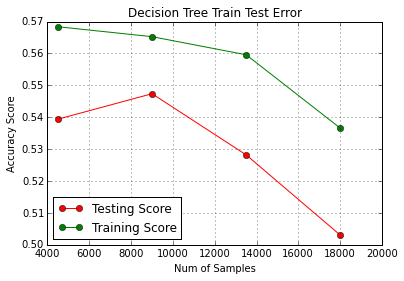

In [116]:
# dt = DecisionTreeClassifier(splitter='best', min_samples_split = 120, min_samples_leaf = 1)
# dt.fit(xTrain, yTrain)
# prune(dt, 380)

# xTrain, xVal, yTrain, yVal = train_test_split(x, 
#                                               y,
#                                               test_size=.1)

sampleNum = []
trainScoreArr = []
testScoreArr = []
index = -1
bestScore = 0

for i in range (1, 5):
    xTrainRound = xTrain
    yTrainRound = yTrain
    if i < 5:
        xTrainRound, throwaway1, yTrainRound, throwaway2 = train_test_split(xTrain, yTrain, test_size=i/5.0)
    
    dt = DecisionTreeClassifier(splitter='best', min_samples_split = 120, min_samples_leaf = 1)
    dt.fit(xTrainRound, yTrainRound)
    prune(dt, 380)
    
    trainPredRes = dt.predict(xTrainRound)
    trainPredRes = pd.DataFrame(data=trainPredRes, columns=['hand'])
    trainAcc = accuracy_score(yTrainRound, trainPredRes)
    
    testPredRes = dt.predict(xVal)
    testPredRes = pd.DataFrame(data=testPredRes, columns=['hand'])
    testAcc = accuracy_score(yVal, testPredRes)
    
    if testAcc > bestScore:
        index = i
        bestScore = testAcc
    trainScoreArr.append(trainAcc)
    testScoreArr.append(testAcc)
    sampleNum.append(22509 * i / 5.0)
    

plt.figure()
plt.title("Decision Tree Train Test Error")
plt.xlabel("Num of Samples")
plt.ylabel("Accuracy Score")
# plt.ylim(*(0.55, 1.02))

plt.grid()

plt.plot(sampleNum, testScoreArr, 'o-', color="r", label = "Testing Score")
plt.plot(sampleNum, trainScoreArr, 'o-', color="g", label = "Training Score")
plt.legend(loc="best")

In [72]:
dt = DecisionTreeClassifier(splitter='best', min_samples_split = 120, min_samples_leaf = 1)
dt.fit(xTrain, yTrain)
prune(dt, 380)
dtPred = dt.predict(xVal)

#Labelling the result
dtPred = pd.DataFrame(data=dtPred, columns=['hand'])

#Printing test metrics
print dtPred.hand.value_counts()
print metrics.classification_report(yVal, dtPred)

0    1784
1     717
Name: hand, dtype: int64
             precision    recall  f1-score   support

          0       0.58      0.82      0.68      1252
          1       0.56      0.37      0.45      1075
          2       0.00      0.00      0.00       104
          3       0.00      0.00      0.00        49
          4       0.00      0.00      0.00         8
          5       0.00      0.00      0.00         3
          6       0.00      0.00      0.00         6
          7       0.00      0.00      0.00         2
          8       0.00      0.00      0.00         1
          9       0.00      0.00      0.00         1

avg / total       0.53      0.57      0.53      2501



In [6]:
dt = DecisionTreeClassifier()
dt.fit(xTrain, yTrain)
dtPred = dt.predict(xVal)

#Labelling the result
dtPred = pd.DataFrame(data=dtPred, columns=['hand'])

#Printing test metrics
print dtPred.hand.value_counts()
print metrics.classification_report(yVal, dtPred)

0    1180
1    1076
2     152
3      64
4      12
5      11
6       5
9       1
Name: hand, dtype: int64
             precision    recall  f1-score   support

          0       0.60      0.57      0.59      1252
          1       0.49      0.49      0.49      1075
          2       0.08      0.12      0.09       104
          3       0.03      0.04      0.04        49
          4       0.08      0.12      0.10         8
          5       0.00      0.00      0.00         3
          6       0.00      0.00      0.00         6
          7       0.00      0.00      0.00         2
          8       0.00      0.00      0.00         1
          9       0.00      0.00      0.00         1

avg / total       0.52      0.50      0.51      2501



/Users/kristiansuhartono/python-env/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [5]:
# Code here is the algorithm tuning zone for the MLP
# Don't run if not needed, the commented out parameters are the ones I tuned
# These take hours to run

mlp = MLPClassifier(max_iter = 300, hidden_layer_sizes = (500,), learning_rate="constant", activation='relu', alpha =0.0008)
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
# parameters = {'activation':('identity', 'logistic', 'tanh', 'relu')}
# parameters = {'learning_rate' :('constant', 'invscaling', 'adaptive')}
# parameters = {'max_iter': (np.arange(100, 1100, 100))}
# parameters = {'hidden_layer_sizes' : ((100,), (200,), (300,), (400,), (500,), (600,),(700,),(800,),(900,))}
# parameters = {'alpha': (np.arange(0.0001, 0.001, 0.0001))}
mlpGS = GridSearchCV(mlp, parameters, cv = cv, scoring='accuracy', verbose=10, n_jobs=-1)
mlpGS.fit(xTrain, yTrain)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV] alpha=0.0001 ....................................................
[CV] alpha=0.0001 ....................................................
[CV] alpha=0.0001 ....................................................
[CV] alpha=0.0001 ....................................................
[CV] ............... alpha=0.0001, score=0.535984007108, total=  37.9s
[CV] alpha=0.0001 ....................................................
[CV] ............... alpha=0.0001, score=0.601066192803, total=  40.9s
[CV] alpha=0.0001 ....................................................
[CV] ............... alpha=0.0001, score=0.587072412261, total=  43.4s
[CV] alpha=0.0001 ....................................................
[CV] ............... alpha=0.0001, score=0.599511328299, total=  44.9s
[CV] alpha=0.0001 ....................................................
[CV] ............... alpha=0.0001, score=0.555975122168, total=  12.5s
[CV] alpha=0.000

[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   51.3s


[CV] ............... alpha=0.0001, score=0.573078631719, total=  14.9s
[CV] alpha=0.0001 ....................................................
[CV] ............... alpha=0.0001, score=0.555308751666, total=  17.1s
[CV] alpha=0.0002 ....................................................
[CV] ............... alpha=0.0001, score=0.617725455353, total=  45.1s
[CV] alpha=0.0002 ....................................................
[CV] ................ alpha=0.0001, score=0.63660595291, total=  53.2s
[CV] alpha=0.0002 ....................................................
[CV] ............... alpha=0.0002, score=0.543758329631, total=   9.1s
[CV] alpha=0.0002 ....................................................


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.8min


[CV] ............... alpha=0.0002, score=0.604842292315, total=  32.6s
[CV] alpha=0.0002 ....................................................
[CV] ............... alpha=0.0001, score=0.589515770769, total= 1.3min
[CV] alpha=0.0002 ....................................................
[CV] ............... alpha=0.0002, score=0.614393602843, total=  45.5s
[CV] alpha=0.0002 ....................................................
[CV] ............... alpha=0.0002, score=0.561972456686, total=  34.8s
[CV] alpha=0.0002 ....................................................
[CV] ............... alpha=0.0002, score=0.576854731231, total=  44.9s
[CV] alpha=0.0002 ....................................................
[CV] ............... alpha=0.0002, score=0.585517547757, total=  48.6s
[CV] alpha=0.0002 ....................................................
[CV] ............... alpha=0.0002, score=0.597290093292, total=  27.1s
[CV] alpha=0.0003 ....................................................


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  2.8min


[CV] ............... alpha=0.0002, score=0.579520213239, total=  27.7s
[CV] alpha=0.0003 ....................................................
[CV] ............... alpha=0.0002, score=0.591070635273, total=  44.4s
[CV] alpha=0.0003 ....................................................
[CV] ............... alpha=0.0002, score=0.619502443359, total=  56.7s
[CV] alpha=0.0003 ....................................................
[CV] ............... alpha=0.0003, score=0.620613060862, total=  50.6s
[CV] alpha=0.0003 ....................................................
[CV] ............... alpha=0.0003, score=0.642603287428, total= 1.3min
[CV] alpha=0.0003 ....................................................
[CV] ............... alpha=0.0003, score=0.605508662817, total=  50.5s
[CV] alpha=0.0003 ....................................................
[CV] ............... alpha=0.0003, score=0.589071523767, total=  25.4s
[CV] alpha=0.0003 ....................................................


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  4.4min


[CV] ............... alpha=0.0003, score=0.605508662817, total=  45.4s
[CV] alpha=0.0003 ....................................................
[CV] ............... alpha=0.0003, score=0.654820079964, total= 1.5min
[CV] alpha=0.0003 ....................................................
[CV] ............... alpha=0.0003, score=0.602843180809, total= 1.4min
[CV] alpha=0.0004 ....................................................
[CV] ............... alpha=0.0003, score=0.585517547757, total=  43.9s
[CV] alpha=0.0004 ....................................................
[CV] ............... alpha=0.0003, score=0.648378498445, total= 1.6min
[CV] alpha=0.0004 ....................................................
[CV] ............... alpha=0.0003, score=0.571079520213, total= 1.2min
[CV] alpha=0.0004 ....................................................
[CV] ............... alpha=0.0004, score=0.558862727677, total=  21.8s
[CV] alpha=0.0004 ....................................................
[CV] .

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  6.8min


[CV] ............... alpha=0.0004, score=0.616170590849, total=  42.7s
[CV] alpha=0.0004 ....................................................
[CV] ............... alpha=0.0004, score=0.610839626833, total= 1.1min
[CV] alpha=0.0004 ....................................................
[CV] ............... alpha=0.0004, score=0.643713904931, total= 1.2min
[CV] alpha=0.0004 ....................................................
[CV] ............... alpha=0.0004, score=0.593958240782, total=  23.0s
[CV] alpha=0.0005 ....................................................
[CV] ................ alpha=0.0004, score=0.56996890271, total=  46.5s
[CV] alpha=0.0005 ....................................................
[CV] ............... alpha=0.0005, score=0.620613060862, total=  35.7s
[CV] alpha=0.0005 ....................................................
[CV] ............... alpha=0.0004, score=0.611950244336, total=  40.7s
[CV] alpha=0.0005 ....................................................
[CV] .

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  8.1min


[CV] ............... alpha=0.0005, score=0.569524655709, total=  21.1s
[CV] alpha=0.0005 ....................................................
[CV] ............... alpha=0.0005, score=0.595735228787, total=  40.4s
[CV] alpha=0.0005 ....................................................
[CV] ............... alpha=0.0005, score=0.588627276766, total=  44.4s
[CV] alpha=0.0005 ....................................................
[CV] ............... alpha=0.0005, score=0.589737894269, total=  29.2s
[CV] alpha=0.0005 ....................................................
[CV] ............... alpha=0.0005, score=0.551310528654, total=  14.9s
[CV] alpha=0.0006 ....................................................
[CV] ............... alpha=0.0005, score=0.605508662817, total=  46.7s
[CV] alpha=0.0006 ....................................................
[CV] ............... alpha=0.0005, score=0.619280319858, total=  47.4s
[CV] alpha=0.0006 ....................................................
[CV] .

[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  9.9min


[CV] ............... alpha=0.0006, score=0.619502443359, total=  44.7s
[CV] alpha=0.0006 ....................................................
[CV] ............... alpha=0.0006, score=0.590404264771, total=  28.2s
[CV] alpha=0.0006 ....................................................
[CV] ............... alpha=0.0006, score=0.631274988894, total= 1.2min
[CV] alpha=0.0006 ....................................................
[CV] ............... alpha=0.0006, score=0.634384717903, total= 1.1min
[CV] alpha=0.0007 ....................................................
[CV] ............... alpha=0.0006, score=0.600621945802, total=  46.3s
[CV] alpha=0.0007 ....................................................
[CV] ................ alpha=0.0006, score=0.63682807641, total= 1.3min
[CV] alpha=0.0007 ....................................................
[CV] ............... alpha=0.0006, score=0.607285650822, total= 1.0min
[CV] alpha=0.0007 ....................................................
[CV] .

[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 12.3min


[CV] ................ alpha=0.0007, score=0.58329631275, total=  42.6s
[CV] alpha=0.0007 ....................................................
[CV] ............... alpha=0.0007, score=0.612394491337, total=  42.7s
[CV] alpha=0.0007 ....................................................
[CV] ................ alpha=0.0007, score=0.62994224789, total= 1.1min
[CV] alpha=0.0008 ....................................................
[CV] ............... alpha=0.0007, score=0.619280319858, total= 1.1min
[CV] alpha=0.0008 ....................................................
[CV] ............... alpha=0.0008, score=0.580852954243, total=  34.1s
[CV] alpha=0.0008 ....................................................
[CV] ............... alpha=0.0007, score=0.618613949356, total= 1.0min
[CV] alpha=0.0008 ....................................................
[CV] ............... alpha=0.0008, score=0.600399822301, total=  35.1s
[CV] alpha=0.0008 ....................................................
[CV] .

[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed: 15.4min


[CV] ............... alpha=0.0008, score=0.652154597956, total= 1.5min
[CV] alpha=0.0009 ....................................................
[CV] ............... alpha=0.0008, score=0.598844957797, total= 1.0min
[CV] alpha=0.0009 ....................................................
[CV] ............... alpha=0.0009, score=0.639049311417, total= 1.3min
[CV] alpha=0.0009 ....................................................
[CV] ............... alpha=0.0009, score=0.629720124389, total= 1.0min
[CV] alpha=0.0009 ....................................................
[CV] ............... alpha=0.0009, score=0.642603287428, total= 1.2min
[CV] alpha=0.0009 ....................................................
[CV] ............... alpha=0.0008, score=0.652154597956, total= 1.7min
[CV] alpha=0.0009 ....................................................
[CV] ............... alpha=0.0009, score=0.545535317637, total=  26.9s
[CV] alpha=0.0009 ....................................................
[CV] .

[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 18.2min finished


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.2, train_size=None),
       error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(500,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=300, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'alpha': array([ 0.0001,  0.0002,  0.0003,  0.0004,  0.0005,  0.0006,  0.0007,
        0.0008,  0.0009])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=10)

In [6]:
# Printing out best estimators for each variable, I change these manually everytime
print(mlpGS.best_score_)
print(mlpGS.best_estimator_.alpha)

0.617125721901
0.0008


/Users/kristiansuhartono/python-env/lib/python2.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


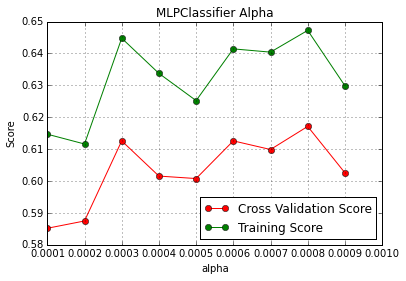

In [7]:
# Graph drawing section, code changed everytime when i need a new graph, will be commented
plt.figure()
plt.title("MLPClassifier Alpha")
plt.xlabel("alpha")
plt.ylabel("Score")

plt.grid()

plt.plot(mlpGS.param_grid['alpha'], mlpGS.cv_results_['mean_test_score'], 'o-', color="r",
         label="Cross Validation Score" )
plt.plot(mlpGS.param_grid['alpha'], mlpGS.cv_results_['mean_train_score'], 'o-', color="g",
         label="Training Score")
plt.legend(loc="best")

<module 'matplotlib.pyplot' from '/Users/kristiansuhartono/python-env/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

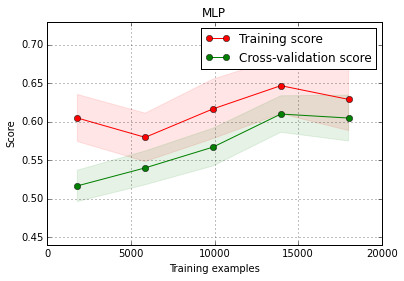

In [6]:
# Learning curve plotter
mlp = MLPClassifier(max_iter = 300, hidden_layer_sizes = (500,), learning_rate="constant", activation='relu', alpha =0.0008)
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plot_learning_curve(mlp, "MLP", xTrain, yTrain, (0.44, 0.73), cv=cv, n_jobs=2)

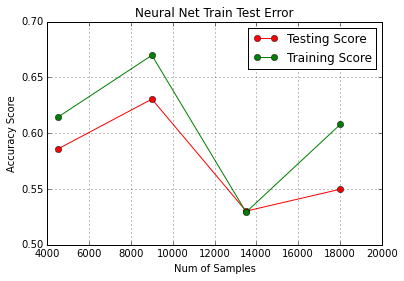

In [123]:
sampleNum = []
trainScoreArr = []
testScoreArr = []
index = -1
bestScore = 0

for i in range (1, 5):
    xTrainRound = xTrain
    yTrainRound = yTrain
    if i < 5:
        xTrainRound, throwaway1, yTrainRound, throwaway2 = train_test_split(xTrain, yTrain, test_size=i/5.0)
    
    
    mlp = MLPClassifier(max_iter = 300, hidden_layer_sizes = (500,), learning_rate="constant", activation='relu', alpha =0.0008)
    mlp.fit(xTrainRound, yTrainRound)
    
    trainPredRes = mlp.predict(xTrainRound)
    trainPredRes = pd.DataFrame(data=trainPredRes, columns=['hand'])
    trainAcc = accuracy_score(yTrainRound, trainPredRes)
    
    testPredRes = mlp.predict(xVal)
    testPredRes = pd.DataFrame(data=testPredRes, columns=['hand'])
    testAcc = accuracy_score(yVal, testPredRes)
    
    if testAcc > bestScore:
        index = i
        bestScore = testAcc
    trainScoreArr.append(trainAcc)
    testScoreArr.append(testAcc)
    sampleNum.append(22509 * i / 5.0)
    

plt.figure()
plt.title("Neural Net Train Test Error")
plt.xlabel("Num of Samples")
plt.ylabel("Accuracy Score")
plt.ylim(*(0.5, 0.7))

plt.grid()

plt.plot(sampleNum, testScoreArr, 'o-', color="r", label = "Testing Score")
plt.plot(sampleNum, trainScoreArr, 'o-', color="g", label = "Training Score")
plt.legend(loc="best")


In [26]:
# Actual fitting and prediction using the tuned values
# mlp = MLPClassifier(max_iter = 300, hidden_layer_sizes = (500,), learning_rate="constant", activation='relu', alpha =0.0008)
mlp = MLPClassifier()
mlp.fit(xTrain, yTrain)
mlpPred = mlp.predict(xVal)

#Labelling the result
mlpPred = pd.DataFrame(data=mlpPred, columns=['hand'])

#Printing test metrics
print mlpPred.hand.value_counts()
print metrics.classification_report(yVal, mlpPred)

0    1513
1     979
2       5
3       3
7       1
Name: hand, dtype: int64
             precision    recall  f1-score   support

          0       0.67      0.82      0.74      1239
          1       0.59      0.55      0.57      1037
          2       0.40      0.01      0.03       150
          3       0.33      0.02      0.04        52
          4       0.00      0.00      0.00        14
          5       0.00      0.00      0.00         3
          6       0.00      0.00      0.00         3
          7       1.00      0.50      0.67         2
          9       0.00      0.00      0.00         1

avg / total       0.61      0.64      0.60      2501



In [84]:
# Code here is the algorithm tuning zone for the MLP
# Don't run if not needed, the commented out parameters are the ones I tuned
# These take hours to run
dt = DecisionTreeClassifier(splitter='best', min_samples_split = 120, min_samples_leaf = 1)
dt.fit(xTrain, yTrain)
prune(dt, 380)
ada = AdaBoostClassifier(base_estimator = dt, n_estimators = 3900, learning_rate = 0.7)
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
# parameters = {'n_estimators':(np.arange(100, 4100, 100))}
# parameters = {'learning_rate': np.arange(0.1, 1.1, 0.1)}
adaGS = GridSearchCV(ada, parameters, cv = cv, scoring='accuracy', verbose=10, n_jobs=-1)
adaGS.fit(xTrain, yTrain)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] learning_rate=0.1 ...............................................
[CV] learning_rate=0.1 ...............................................
[CV] learning_rate=0.1 ...............................................
[CV] learning_rate=0.1 ...............................................
[CV] .......... learning_rate=0.1, score=0.569080408707, total= 5.8min
[CV] .......... learning_rate=0.1, score=0.574855619725, total= 5.8min
[CV] learning_rate=0.1 ...............................................
[CV] learning_rate=0.1 ...............................................
[CV] ........... learning_rate=0.1, score=0.57663260773, total= 5.9min
[CV] learning_rate=0.1 ...............................................
[CV] .......... learning_rate=0.1, score=0.577521101733, total= 5.9min
[CV] learning_rate=0.1 ...............................................
[CV] .......... learning_rate=0.1, score=0.595290981786, total= 5.8min
[CV] learning_

[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed: 13.2min


[CV] .......... learning_rate=0.1, score=0.571523767215, total= 5.8min
[CV] learning_rate=0.1 ...............................................
[CV] .......... learning_rate=0.1, score=0.551976899156, total= 5.9min
[CV] learning_rate=0.2 ...............................................
[CV] .......... learning_rate=0.1, score=0.576188360729, total= 5.9min
[CV] learning_rate=0.2 ...............................................
[CV] .......... learning_rate=0.1, score=0.581297201244, total= 5.9min
[CV] learning_rate=0.2 ...............................................
[CV] .......... learning_rate=0.2, score=0.578853842737, total= 5.9min
[CV] learning_rate=0.2 ...............................................


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 19.9min


[CV] .......... learning_rate=0.1, score=0.575077743225, total= 6.0min
[CV] learning_rate=0.2 ...............................................
[CV] .......... learning_rate=0.2, score=0.583074189249, total= 6.0min
[CV] learning_rate=0.2 ...............................................
[CV] .......... learning_rate=0.2, score=0.577743225233, total= 5.8min
[CV] learning_rate=0.2 ...............................................
[CV] .......... learning_rate=0.2, score=0.581963571746, total= 6.0min
[CV] learning_rate=0.2 ...............................................
[CV] .......... learning_rate=0.2, score=0.559751221679, total= 6.0min
[CV] learning_rate=0.2 ...............................................
[CV] .......... learning_rate=0.2, score=0.592847623279, total= 5.9min
[CV] learning_rate=0.2 ...............................................
[CV] .......... learning_rate=0.2, score=0.579742336739, total= 5.9min
[CV] learning_rate=0.3 ...............................................


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 33.0min


[CV] .......... learning_rate=0.2, score=0.581519324745, total= 5.8min
[CV] learning_rate=0.3 ...............................................
[CV] .......... learning_rate=0.2, score=0.575744113727, total= 6.0min
[CV] learning_rate=0.3 ...............................................
[CV] ........... learning_rate=0.2, score=0.58662816526, total= 5.9min
[CV] learning_rate=0.3 ...............................................
[CV] .......... learning_rate=0.3, score=0.572190137717, total= 5.5min
[CV] learning_rate=0.3 ...............................................
[CV] .......... learning_rate=0.3, score=0.582852065749, total= 5.6min
[CV] learning_rate=0.3 ...............................................
[CV] .......... learning_rate=0.3, score=0.579075966237, total= 5.6min
[CV] learning_rate=0.3 ...............................................
[CV] .......... learning_rate=0.3, score=0.589071523767, total= 5.7min
[CV] learning_rate=0.3 ...............................................


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 39.5min


[CV] .......... learning_rate=0.3, score=0.581075077743, total= 5.6min
[CV] learning_rate=0.3 ...............................................
[CV] .......... learning_rate=0.3, score=0.599067081297, total= 5.5min
[CV] learning_rate=0.3 ...............................................
[CV] .......... learning_rate=0.3, score=0.595068858285, total= 5.5min
[CV] learning_rate=0.4 ...............................................
[CV] .......... learning_rate=0.3, score=0.576188360729, total= 5.6min
[CV] learning_rate=0.4 ...............................................
[CV] .......... learning_rate=0.3, score=0.584851177255, total= 5.5min
[CV] learning_rate=0.4 ...............................................
[CV] .......... learning_rate=0.3, score=0.587960906264, total= 5.4min
[CV] learning_rate=0.4 ...............................................
[CV] ........... learning_rate=0.4, score=0.57330075522, total= 5.4min
[CV] learning_rate=0.4 ...............................................
[CV] .

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 57.8min


[CV] .......... learning_rate=0.4, score=0.568414038205, total= 5.4min
[CV] learning_rate=0.4 ...............................................
[CV] .......... learning_rate=0.4, score=0.577076854731, total= 5.5min
[CV] learning_rate=0.4 ...............................................
[CV] .......... learning_rate=0.4, score=0.590182141271, total= 5.4min
[CV] learning_rate=0.4 ...............................................
[CV] .......... learning_rate=0.4, score=0.586183918259, total= 5.4min
[CV] learning_rate=0.5 ...............................................
[CV] .......... learning_rate=0.4, score=0.573967125722, total= 5.5min
[CV] learning_rate=0.5 ...............................................
[CV] .......... learning_rate=0.4, score=0.585295424256, total= 5.4min
[CV] learning_rate=0.5 ...............................................
[CV] ........... learning_rate=0.4, score=0.58662816526, total= 5.3min
[CV] learning_rate=0.5 ...............................................
[CV] .

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 69.9min


[CV] .......... learning_rate=0.5, score=0.570191026211, total= 5.3min
[CV] learning_rate=0.5 ...............................................
[CV] .......... learning_rate=0.5, score=0.584406930253, total= 5.4min
[CV] learning_rate=0.5 ...............................................
[CV] .......... learning_rate=0.5, score=0.575744113727, total= 5.4min
[CV] learning_rate=0.5 ...............................................
[CV] .......... learning_rate=0.5, score=0.591514882275, total= 5.3min
[CV] learning_rate=0.5 ...............................................
[CV] ........... learning_rate=0.5, score=0.59329187028, total= 5.4min
[CV] learning_rate=0.6 ...............................................
[CV] .......... learning_rate=0.5, score=0.575521990227, total= 5.4min
[CV] learning_rate=0.6 ...............................................
[CV] .......... learning_rate=0.5, score=0.575744113727, total= 5.3min
[CV] learning_rate=0.6 ...............................................
[CV] .

[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed: 87.6min


[CV] .......... learning_rate=0.6, score=0.586850288761, total= 5.2min
[CV] learning_rate=0.6 ...............................................
[CV] .......... learning_rate=0.6, score=0.580852954243, total= 5.2min
[CV] learning_rate=0.6 ...............................................
[CV] .......... learning_rate=0.6, score=0.591070635273, total= 5.1min
[CV] learning_rate=0.6 ...............................................
[CV] ........... learning_rate=0.6, score=0.58662816526, total= 5.4min
[CV] learning_rate=0.7 ...............................................
[CV] .......... learning_rate=0.6, score=0.584184806753, total= 5.4min
[CV] learning_rate=0.7 ...............................................
[CV] .......... learning_rate=0.6, score=0.586183918259, total= 5.3min
[CV] learning_rate=0.7 ...............................................
[CV] .......... learning_rate=0.6, score=0.587960906264, total= 5.3min
[CV] learning_rate=0.7 ...............................................
[CV] .

[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 99.9min


[CV] .......... learning_rate=0.7, score=0.577743225233, total= 5.5min
[CV] learning_rate=0.7 ...............................................
[CV] .......... learning_rate=0.7, score=0.588849400267, total= 5.4min
[CV] learning_rate=0.7 ...............................................
[CV] .......... learning_rate=0.7, score=0.589737894269, total= 5.5min
[CV] learning_rate=0.8 ...............................................
[CV] .......... learning_rate=0.7, score=0.584629053754, total= 5.5min
[CV] learning_rate=0.8 ...............................................
[CV] .......... learning_rate=0.7, score=0.583074189249, total= 5.6min
[CV] learning_rate=0.8 ...............................................
[CV] .......... learning_rate=0.7, score=0.592625499778, total= 5.7min
[CV] learning_rate=0.8 ...............................................
[CV] .......... learning_rate=0.8, score=0.565082185695, total= 5.6min
[CV] learning_rate=0.8 ...............................................
[CV] .

[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed: 124.7min


[CV] .......... learning_rate=0.8, score=0.577965348734, total= 5.7min
[CV] learning_rate=0.9 ...............................................
[CV] .......... learning_rate=0.8, score=0.587738782763, total= 5.7min
[CV] learning_rate=0.9 ...............................................
[CV] .......... learning_rate=0.8, score=0.582629942248, total= 5.6min
[CV] learning_rate=0.9 ...............................................
[CV] .......... learning_rate=0.9, score=0.573078631719, total= 4.8min
[CV] learning_rate=0.9 ...............................................
[CV] .......... learning_rate=0.9, score=0.599733451799, total= 4.9min
[CV] learning_rate=0.9 ...............................................
[CV] .......... learning_rate=0.9, score=0.585739671257, total= 4.9min
[CV] learning_rate=0.9 ...............................................
[CV] .......... learning_rate=0.9, score=0.571301643714, total= 4.9min
[CV] learning_rate=0.9 ...............................................
[CV] .

[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed: 140.9min


[CV] .......... learning_rate=1.0, score=0.569746779209, total= 4.5min
[CV] learning_rate=1.0 ...............................................
[CV] .......... learning_rate=1.0, score=0.592181252777, total= 4.6min
[CV] learning_rate=1.0 ...............................................
[CV] .......... learning_rate=1.0, score=0.585295424256, total= 4.5min
[CV] learning_rate=1.0 ...............................................
[CV] .......... learning_rate=1.0, score=0.570413149711, total= 4.5min
[CV] learning_rate=1.0 ...............................................
[CV] .......... learning_rate=1.0, score=0.578409595735, total= 4.5min
[CV] learning_rate=1.0 ...............................................
[CV] .......... learning_rate=1.0, score=0.591070635273, total= 4.6min
[CV] learning_rate=1.0 ...............................................
[CV] .......... learning_rate=1.0, score=0.585961794758, total= 5.4min
[CV] .......... learning_rate=1.0, score=0.573967125722, total= 5.5min
[CV] .

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 152.4min finished


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.2, train_size=None),
       error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=120,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=3900, random_state=None),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'learning_rate': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=10)

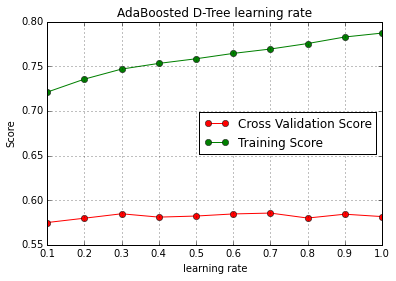

In [86]:
# Graph drawing section, code changed everytime when i need a new graph, will be commented
plt.figure()
plt.title("AdaBoosted D-Tree learning rate")
plt.xlabel("learning rate")
plt.ylabel("Score")

plt.grid()

plt.plot(adaGS.param_grid['learning_rate'], adaGS.cv_results_['mean_test_score'], 'o-', color="r",
         label="Cross Validation Score" )
plt.plot(adaGS.param_grid['learning_rate'], adaGS.cv_results_['mean_train_score'], 'o-', color="g",
         label="Training Score")
plt.legend(loc="best")

In [87]:
print(adaGS.best_score_)
print(adaGS.best_estimator_.learning_rate)
print adaGS.cv_results_['mean_test_score']
print adaGS.cv_results_['mean_train_score']

0.585539760107
0.7
[ 0.57494447  0.57978676  0.58474012  0.58100844  0.58220791  0.58456242
  0.58553976  0.57996446  0.58427366  0.58160817]
[ 0.72102516  0.7355695   0.74682623  0.75317377  0.75836064  0.76437497
  0.76928417  0.77542067  0.78275671  0.78713278]


In [92]:
dt = DecisionTreeClassifier(splitter='best', min_samples_split = 120, min_samples_leaf = 1)
dt.fit(xTrain, yTrain)
prune(dt, 380)
ada = AdaBoostClassifier(base_estimator = dt, n_estimators = 3900, learning_rate = 0.7)
ada.fit(xTrain, yTrain)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=380, min_samples_split=120,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.7, n_estimators=3900, random_state=None)

In [93]:
adaPred= ada.predict(xVal)

#Labelling the result
adaPred = pd.DataFrame(data=adaPred, columns=['hand'])

#Printing test metrics
print adaPred.hand.value_counts()
print metrics.classification_report(yVal, adaPred)

0    1233
1    1003
2     243
3      22
Name: hand, dtype: int64
             precision    recall  f1-score   support

          0       0.56      0.56      0.56      1252
          1       0.46      0.43      0.45      1075
          2       0.07      0.16      0.10       104
          3       0.00      0.00      0.00        49
          4       0.00      0.00      0.00         8
          5       0.00      0.00      0.00         3
          6       0.00      0.00      0.00         6
          7       0.00      0.00      0.00         2
          8       0.00      0.00      0.00         1
          9       0.00      0.00      0.00         1

avg / total       0.48      0.47      0.48      2501



In [94]:
dt = DecisionTreeClassifier(splitter='best', min_samples_split = 120, min_samples_leaf = 1)
dt.fit(xTrain, yTrain)
prune(dt, 380)
ada = AdaBoostClassifier()
ada.fit(xTrain, yTrain)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [95]:
adaPred= ada.predict(xVal)

#Labelling the result
adaPred = pd.DataFrame(data=adaPred, columns=['hand'])

#Printing test metrics
print adaPred.hand.value_counts()
print metrics.classification_report(yVal, adaPred)

0    2297
1     108
8      96
Name: hand, dtype: int64
             precision    recall  f1-score   support

          0       0.50      0.91      0.65      1252
          1       0.45      0.05      0.08      1075
          2       0.00      0.00      0.00       104
          3       0.00      0.00      0.00        49
          4       0.00      0.00      0.00         8
          5       0.00      0.00      0.00         3
          6       0.00      0.00      0.00         6
          7       0.00      0.00      0.00         2
          8       0.00      0.00      0.00         1
          9       0.00      0.00      0.00         1

avg / total       0.44      0.48      0.36      2501



/Users/kristiansuhartono/python-env/lib/python2.7/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


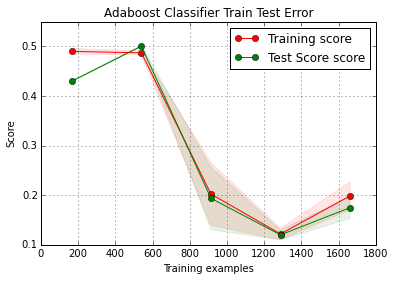

In [100]:
dt = DecisionTreeClassifier(splitter='best', min_samples_split = 120, min_samples_leaf = 1)
dt.fit(xTrain, yTrain)
prune(dt, 380)
ada = AdaBoostClassifier(base_estimator = dt, n_estimators = 3900, learning_rate = 0.7)

plt.figure()
plt.title("Adaboost Classifier Train Test Error")
plt.xlabel("Training examples")
plt.ylabel("Score")
train_sizes, train_scores, test_scores = learning_curve(
    ada, xVal, yVal, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Test Score score")

plt.legend(loc="best")

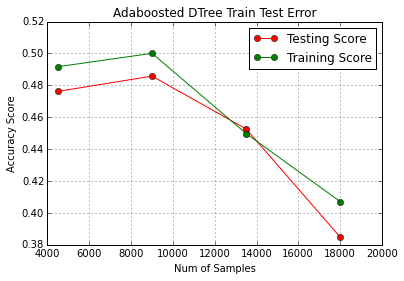

In [122]:
sampleNum = []
trainScoreArr = []
testScoreArr = []
index = -1
bestScore = 0

for i in range (1, 5):
    xTrainRound = xTrain
    yTrainRound = yTrain
    if i < 5:
        xTrainRound, throwaway1, yTrainRound, throwaway2 = train_test_split(xTrain, yTrain, test_size=i/5.0)
    
    dt = DecisionTreeClassifier(splitter='best', min_samples_split = 120, min_samples_leaf = 1)
    dt.fit(xTrainRound, yTrainRound)
    prune(dt, 380)
    ada = AdaBoostClassifier(base_estimator = dt, n_estimators = 3900, learning_rate = 0.7)
    ada.fit(xTrainRound, yTrainRound)
    
    trainPredRes = ada.predict(xTrainRound)
    trainPredRes = pd.DataFrame(data=trainPredRes, columns=['hand'])
    trainAcc = accuracy_score(yTrainRound, trainPredRes)
    
    testPredRes = ada.predict(xVal)
    testPredRes = pd.DataFrame(data=testPredRes, columns=['hand'])
    testAcc = accuracy_score(yVal, testPredRes)
    
    if testAcc > bestScore:
        index = i
        bestScore = testAcc
    trainScoreArr.append(trainAcc)
    testScoreArr.append(testAcc)
    sampleNum.append(22509 * i / 5.0)
    

plt.figure()
plt.title("Adaboosted DTree Train Test Error")
plt.xlabel("Num of Samples")
plt.ylabel("Accuracy Score")
# plt.ylim(*(0.55, 1.02))

plt.grid()

plt.plot(sampleNum, testScoreArr, 'o-', color="r", label = "Testing Score")
plt.plot(sampleNum, trainScoreArr, 'o-', color="g", label = "Training Score")
plt.legend(loc="best")


In [14]:
# SVM section
svc = SVC(kernel= 'linear', C = 0.2)
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
# parameters = {'kernel':('linear', 'poly', 'rbf', 'sigmod', 'precomputed')}
parameters = {'C':(np.arange(0.2, 1.2, 0.2))}
svcGS = GridSearchCV(svc, parameters, cv = cv, scoring='accuracy', verbose=10, n_jobs=-1)
svcGS.fit(xTrain, yTrain)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] C=0.2 ...........................................................
[CV] C=0.2 ...........................................................
[CV] C=0.2 ...........................................................
[CV] C=0.2 ...........................................................
[CV] ...................... C=0.2, score=0.499555752999, total=  26.7s
[CV] C=0.2 ...........................................................
[CV] ...................... C=0.2, score=0.496223900489, total=  26.6s
[CV] C=0.4 ...........................................................
[CV] ...................... C=0.2, score=0.498667258996, total=  26.8s
[CV] C=0.4 ...........................................................
[CV] ...................... C=0.2, score=0.501999111506, total=  26.8s
[CV] C=0.4 ...........................................................
[CV] ...................... C=0.2, score=0.503776099511, total=  25.0s
[CV] C=0.4 ......

[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  1.3min


[CV] ...................... C=0.4, score=0.498667258996, total=  33.6s
[CV] C=0.4 ...........................................................
[CV] ...................... C=0.4, score=0.499555752999, total=  34.1s
[CV] C=0.6 ...........................................................
[CV] ...................... C=0.4, score=0.496223900489, total=  33.9s
[CV] C=0.6 ...........................................................
[CV] ...................... C=0.4, score=0.501999111506, total=  35.2s
[CV] C=0.6 ...........................................................
[CV] ...................... C=0.4, score=0.503776099511, total=  33.7s
[CV] C=0.6 ...........................................................


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  2.2min


[CV] ...................... C=0.6, score=0.499555752999, total=  41.4s
[CV] C=0.6 ...........................................................
[CV] ...................... C=0.6, score=0.498667258996, total=  41.4s
[CV] C=0.8 ...........................................................
[CV] ...................... C=0.6, score=0.496223900489, total=  43.2s
[CV] C=0.8 ...........................................................
[CV] ...................... C=0.6, score=0.501999111506, total=  41.5s
[CV] C=0.8 ...........................................................
[CV] ...................... C=0.6, score=0.503776099511, total=  41.9s
[CV] C=0.8 ...........................................................
[CV] ...................... C=0.8, score=0.499555752999, total=  47.6s
[CV] C=0.8 ...........................................................
[CV] ...................... C=0.8, score=0.498667258996, total=  48.5s
[CV] C=1.0 ...........................................................


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  3.9min


[CV] ...................... C=0.8, score=0.496223900489, total=  48.5s
[CV] C=1.0 ...........................................................
[CV] ...................... C=0.8, score=0.501999111506, total=  48.1s
[CV] C=1.0 ...........................................................
[CV] ...................... C=0.8, score=0.503776099511, total=  49.4s
[CV] C=1.0 ...........................................................
[CV] ...................... C=1.0, score=0.499555752999, total=  55.3s
[CV] C=1.0 ...........................................................


[Parallel(n_jobs=-1)]: Done  21 out of  25 | elapsed:  5.2min remaining:   59.0s


[CV] ...................... C=1.0, score=0.498667258996, total=  58.8s
[CV] ...................... C=1.0, score=0.496223900489, total= 1.0min
[CV] ...................... C=1.0, score=0.501999111506, total= 1.1min
[CV] ...................... C=1.0, score=0.503776099511, total=  44.7s


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  6.0min finished


GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=0, test_size=0.2, train_size=None),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': array([ 0.2,  0.4,  0.6,  0.8,  1. ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=10)

In [15]:
# Printing out best estimators for each variable, I change these manually everytime
print(svcGS.best_score_)
print(svcGS.best_estimator_.C)
print svcGS.cv_results_['mean_test_score']
print svcGS.cv_results_['mean_train_score']

0.5000444247
0.2
[ 0.50004442  0.50004442  0.50004442  0.50004442  0.50004442]
[ 0.49996113  0.49996113  0.49996113  0.49996113  0.49996113]


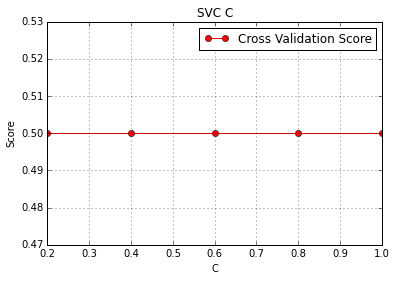

In [18]:
# Graph drawing section, code changed everytime when i need a new graph, will be commented
plt.figure()
plt.title("SVC C")
plt.xlabel("C")
plt.ylabel("Score")
# plt.ylim(*(0.55, 1.02))

plt.grid()

plt.plot(svcGS.param_grid['C'], svcGS.cv_results_['mean_test_score'], 'o-', color="r",
         label="Cross Validation Score" )
# plt.plot(svcGS.param_grid['C'], svcGS.cv_results_['mean_train_score'], 'o-', color="g",
#          label="Training Score")
plt.legend(loc="best")

Linear Done
RBF Done


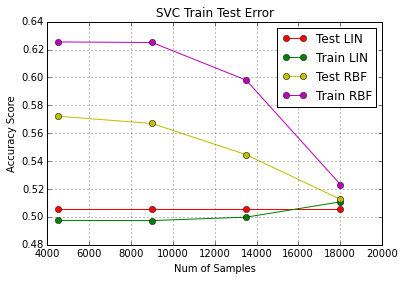

In [6]:
sampleNum = []
trainScoreArr1 = []
testScoreArr1 = []
trainScoreArr2 = []
testScoreArr2 = []
index = -1
bestScore = 0

for i in range (1, 5):
    xTrainRound = xTrain
    yTrainRound = yTrain
    if i < 5:
        xTrainRound, throwaway1, yTrainRound, throwaway2 = train_test_split(xTrain, yTrain, test_size=i/5.0)
    
    svc = SVC(kernel= 'linear', C = 0.2)
    svc.fit(xTrainRound, yTrainRound)
    
    trainPredRes = svc.predict(xTrainRound)
    trainPredRes = pd.DataFrame(data=trainPredRes, columns=['hand'])
    trainAcc = accuracy_score(yTrainRound, trainPredRes)
    
    testPredRes = svc.predict(xVal)
    testPredRes = pd.DataFrame(data=testPredRes, columns=['hand'])
    testAcc = accuracy_score(yVal, testPredRes)
    
    if testAcc > bestScore:
        index = i
        bestScore = testAcc
    trainScoreArr1.append(trainAcc)
    testScoreArr1.append(testAcc)
    sampleNum.append(22509 * i / 5.0)
    
print "Linear Done"
for i in range (1, 5):
    xTrainRound = xTrain
    yTrainRound = yTrain
    if i < 5:
        xTrainRound, throwaway1, yTrainRound, throwaway2 = train_test_split(xTrain, yTrain, test_size=i/5.0)
    
    svc = SVC(kernel= 'rbf', C = 0.2)
    svc.fit(xTrainRound, yTrainRound)
    
    trainPredRes = svc.predict(xTrainRound)
    trainPredRes = pd.DataFrame(data=trainPredRes, columns=['hand'])
    trainAcc = accuracy_score(yTrainRound, trainPredRes)
    
    testPredRes = svc.predict(xVal)
    testPredRes = pd.DataFrame(data=testPredRes, columns=['hand'])
    testAcc = accuracy_score(yVal, testPredRes)
    
    if testAcc > bestScore:
        index = i
        bestScore = testAcc
    trainScoreArr2.append(trainAcc)
    testScoreArr2.append(testAcc)
    
print "RBF Done"

plt.figure()
plt.title("SVC Train Test Error")
plt.xlabel("Num of Samples")
plt.ylabel("Accuracy Score")
# plt.ylim(*(0.55, 1.02))

plt.grid()

plt.plot(sampleNum, testScoreArr1, 'o-', color="r", label = "Test LIN")
plt.plot(sampleNum, trainScoreArr1, 'o-', color="g", label = "Train LIN")
plt.plot(sampleNum, testScoreArr2, 'o-', color="y", label = "Test RBF")
plt.plot(sampleNum, trainScoreArr2, 'o-', color="m", label = "Train RBF")
plt.legend(loc="best")


In [5]:
# Code here is the algorithm tuning zone for KNN
# Don't run if not needed, the commented out parameters are the ones I tuned
# These take hours to run

#distance didn't have much difference in test score, but had perfect train
knn = KNeighborsClassifier(algorithm='brute', weights= 'distance', n_neighbors= 10, p=1)
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
# parameters = {'algorithm':('ball_tree', 'kd_tree', 'brute')}
# parameters = {'weights':('uniform', 'distance')}
parameters = {'n_neighbors' : (np.arange(1, 11))}
# parameters = {'p': (np.arange(1, 4))}
knnGS = GridSearchCV(knn, parameters, cv = cv, scoring='accuracy', verbose=10, n_jobs=-1)
knnGS.fit(xTrain, yTrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_neighbors=1 ...................................................
[CV] n_neighbors=1 ...................................................
[CV] n_neighbors=1 ...................................................
[CV] n_neighbors=1 ...................................................
[CV] .............. n_neighbors=1, score=0.517547756553, total=   5.0s
[CV] .............. n_neighbors=1, score=0.517547756553, total=   5.0s
[CV] .............. n_neighbors=1, score=0.518214127055, total=   5.0s
[CV] .............. n_neighbors=1, score=0.532430031097, total=   5.0s
[CV] n_neighbors=1 ...................................................
[CV] n_neighbors=2 ...................................................
[CV] n_neighbors=2 ...................................................
[CV] n_neighbors=2 ...................................................
[CV] ............... n_neighbors=1, score=0.51332741004, total=   3.7s
[CV] n_neighbors

[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  2.9min


[CV] n_neighbors=3 ...................................................
[CV] .............. n_neighbors=2, score=0.531985784096, total=   4.0s
[CV] n_neighbors=3 ...................................................
[CV] .............. n_neighbors=2, score=0.540426477121, total=   5.2s
[CV] n_neighbors=3 ...................................................
[CV] .............. n_neighbors=2, score=0.525544202577, total=   5.3s
[CV] n_neighbors=3 ...................................................
[CV] .............. n_neighbors=3, score=0.533540648601, total=   5.3s
[CV] .............. n_neighbors=3, score=0.534651266104, total=   5.2s
[CV] n_neighbors=3 ...................................................


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  4.5min


[CV] n_neighbors=4 ...................................................
[CV] .............. n_neighbors=3, score=0.539315859618, total=   3.6s
[CV] n_neighbors=4 ...................................................
[CV] .............. n_neighbors=3, score=0.539315859618, total=   3.6s
[CV] .............. n_neighbors=3, score=0.545313194136, total=   3.7s
[CV] n_neighbors=4 ...................................................
[CV] n_neighbors=4 ...................................................
[CV] .............. n_neighbors=4, score=0.547312305642, total=   4.3s
[CV] n_neighbors=4 ...................................................
[CV] .............. n_neighbors=4, score=0.547756552643, total=   6.4s
[CV] n_neighbors=5 ...................................................
[CV] .............. n_neighbors=4, score=0.562860950689, total=   6.1s
[CV] .............. n_neighbors=4, score=0.555308751666, total=   5.8s
[CV] n_neighbors=5 ...................................................


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  7.5min


[CV] n_neighbors=5 ...................................................
[CV] .............. n_neighbors=4, score=0.546201688139, total=   5.5s
[CV] n_neighbors=5 ...................................................
[CV] ............... n_neighbors=5, score=0.54997778765, total=   6.2s
[CV] n_neighbors=5 ...................................................
[CV] .............. n_neighbors=5, score=0.562194580187, total=   6.0s
[CV] n_neighbors=6 ...................................................
[CV] .............. n_neighbors=5, score=0.551088405153, total=   6.3s
[CV] n_neighbors=6 ...................................................
[CV] .............. n_neighbors=5, score=0.553976010662, total=   7.3s
[CV] n_neighbors=6 ...................................................


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  9.1min


[CV] ............... n_neighbors=5, score=0.55664149267, total=   6.7s
[CV] n_neighbors=6 ...................................................
[CV] .............. n_neighbors=6, score=0.555530875167, total=   6.6s
[CV] n_neighbors=6 ...................................................
[CV] .............. n_neighbors=6, score=0.556419369169, total=   6.1s
[CV] n_neighbors=7 ...................................................
[CV] .............. n_neighbors=6, score=0.572412261217, total=   6.1s
[CV] n_neighbors=7 ...................................................
[CV] .............. n_neighbors=6, score=0.560639715682, total=   5.9s
[CV] n_neighbors=7 ...................................................
[CV] .............. n_neighbors=6, score=0.562194580187, total=   5.9s
[CV] n_neighbors=7 ...................................................
[CV] .............. n_neighbors=7, score=0.560195468681, total=   6.0s
[CV] n_neighbors=7 ...................................................
[CV] .

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 13.4min


[CV] .............. n_neighbors=7, score=0.567525544203, total=   6.7s
[CV] .............. n_neighbors=7, score=0.565082185695, total=   6.5s
[CV] n_neighbors=8 ...................................................
[CV] n_neighbors=8 ...................................................
[CV] .............. n_neighbors=8, score=0.560639715682, total=   6.9s
[CV] n_neighbors=8 ...................................................
[CV] .............. n_neighbors=8, score=0.569080408707, total=   6.6s
[CV] n_neighbors=9 ...................................................
[CV] .............. n_neighbors=8, score=0.579075966237, total=   6.8s
[CV] .............. n_neighbors=8, score=0.563749444691, total=   6.3s
[CV] n_neighbors=9 ...................................................
[CV] n_neighbors=9 ...................................................
[CV] .............. n_neighbors=8, score=0.573967125722, total=   7.3s
[CV] n_neighbors=9 ...................................................
[CV] .

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 16.3min


[CV] n_neighbors=10 ..................................................
[CV] .............. n_neighbors=9, score=0.570857396713, total=   5.3s
[CV] n_neighbors=10 ..................................................
[CV] .............. n_neighbors=9, score=0.570413149711, total=  10.0s
[CV] n_neighbors=10 ..................................................
[CV] ............. n_neighbors=10, score=0.571968014216, total=   9.3s
[CV] n_neighbors=10 ..................................................
[CV] ............. n_neighbors=10, score=0.574855619725, total=   9.9s
[CV] ............. n_neighbors=10, score=0.581963571746, total=   7.5s
[CV] ............. n_neighbors=10, score=0.574855619725, total=   3.6s
[CV] ............. n_neighbors=10, score=0.574633496224, total=   3.4s


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 18.6min finished


GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=0, test_size=0.2, train_size=None),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=50, p=1,
           weights='distance'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=10)

In [6]:
# Printing out best estimators for each variable, I change these manually everytime
print(knnGS.best_score_)
print(knnGS.best_estimator_.n_neighbors)
print knnGS.cv_results_['mean_test_score']
print knnGS.cv_results_['mean_train_score']

0.575655264327
10
[ 0.51981342  0.53625056  0.53842737  0.55188805  0.55477566  0.56143936
  0.56552643  0.56930253  0.56943581  0.57565526]
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


/Users/kristiansuhartono/python-env/lib/python2.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


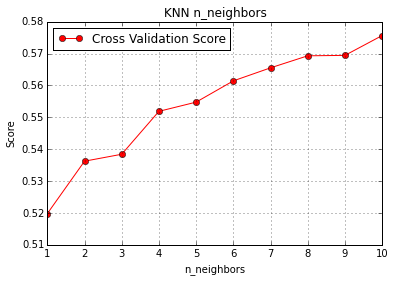

In [8]:
# Graph drawing section, code changed everytime when i need a new graph, will be commented
plt.figure()
plt.title("KNN n_neighbors")
plt.xlabel("n_neighbors")
plt.ylabel("Score")
# plt.ylim(*(0.55, 1.02))

plt.grid()

plt.plot(knnGS.param_grid['n_neighbors'], knnGS.cv_results_['mean_test_score'], 'o-', color="r",
         label="Cross Validation Score" )
# plt.plot(knnGS.param_grid['n_neighbors'], knnGS.cv_results_['mean_train_score'], 'o-', color="g",
#          label="Training Score")
plt.legend(loc="best")

<module 'matplotlib.pyplot' from '/Users/kristiansuhartono/python-env/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

/Users/kristiansuhartono/python-env/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


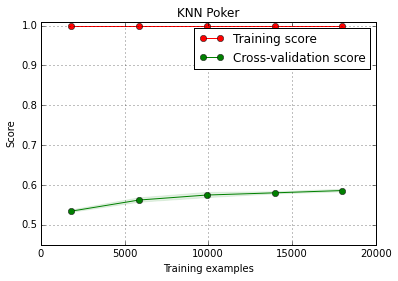

In [23]:
knn = KNeighborsClassifier(algorithm='brute', weights= 'distance', n_neighbors= 10, p=1)
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
plot_learning_curve(knn, "KNN Poker", xTrain, yTrain, (0.45, 1.01), cv = cv, n_jobs = -1)

In [25]:
# knn = KNeighborsClassifier(algorithm='brute', weights= 'distance', n_neighbors= 50, p=1)
knn = KNeighborsClassifier()
knn.fit(xTrain, yTrain)
knnPred = knn.predict(xVal)

#Labelling the result
knnPred = pd.DataFrame(data=knnPred, columns=['hand'])

#Printing test metrics
print knnPred.hand.value_counts()
print metrics.classification_report(yVal, knnPred)

0    1461
1    1019
2      16
3       5
Name: hand, dtype: int64
             precision    recall  f1-score   support

          0       0.60      0.70      0.64      1239
          1       0.50      0.49      0.50      1037
          2       0.38      0.04      0.07       150
          3       0.00      0.00      0.00        52
          4       0.00      0.00      0.00        14
          5       0.00      0.00      0.00         3
          6       0.00      0.00      0.00         3
          7       0.00      0.00      0.00         2
          9       0.00      0.00      0.00         1

avg / total       0.53      0.55      0.53      2501



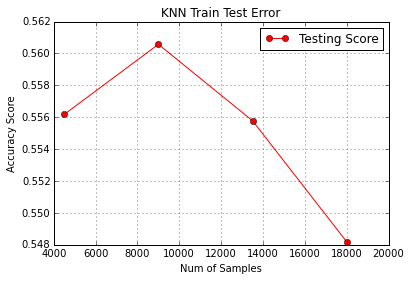

In [12]:
sampleNum = []
trainScoreArr = []
testScoreArr = []
index = -1
bestScore = 0

for i in range (1, 5):
    xTrainRound = xTrain
    yTrainRound = yTrain
    if i < 5:
        xTrainRound, throwaway1, yTrainRound, throwaway2 = train_test_split(xTrain, yTrain, test_size=i/5.0)
    
    knn = KNeighborsClassifier(algorithm='brute', weights= 'distance', n_neighbors= 10, p=1)
    knn.fit(xTrainRound, yTrainRound)
    
    trainPredRes = knn.predict(xTrainRound)
    trainPredRes = pd.DataFrame(data=trainPredRes, columns=['hand'])
    trainAcc = accuracy_score(yTrainRound, trainPredRes)
    
    testPredRes = knn.predict(xVal)
    testPredRes = pd.DataFrame(data=testPredRes, columns=['hand'])
    testAcc = accuracy_score(yVal, testPredRes)
    
    if testAcc > bestScore:
        index = i
        bestScore = testAcc
    trainScoreArr.append(trainAcc)
    testScoreArr.append(testAcc)
    sampleNum.append(22509 * i / 5.0)
    

plt.figure()
plt.title("KNN Train Test Error")
plt.xlabel("Num of Samples")
plt.ylabel("Accuracy Score")
# plt.ylim(*(0.55, 1.02))

plt.grid()

plt.plot(sampleNum, testScoreArr, 'o-', color="r", label = "Testing Score")
# plt.plot(sampleNum, trainScoreArr, 'o-', color="g", label = "Training Score")
plt.legend(loc="best")
